In [1]:
import pandas as pd; import numpy as np 

animes = pd.read_csv('anime.csv')
ratings = pd.read_csv('rating.csv')

ratings = ratings[ratings.rating != -1]
ratings.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [2]:
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
len(ratings)/ratings['user_id'].nunique() # avg number of anime rated per user

91.05231321839081

In [4]:
len(animes['anime_id'].unique()) # number of unique animes (in anime list, not ratings)

12294

In [5]:
animes['anime_id'].nunique()

12294

91.05231321839081


<AxesSubplot:>

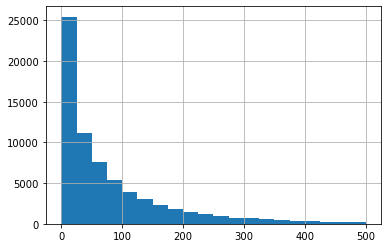

In [6]:
# avg number of anime rated per user
import statistics
ratings_per_user = ratings.groupby('user_id')['rating'].count()
print(statistics.mean(ratings_per_user.tolist())) 


import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_user.hist(bins=20, range=(0,500))

In [7]:
# avg number of ratings given per anime
ratings_per_anime = ratings.groupby('anime_id')['rating'].count()
statistics.mean(ratings_per_anime.tolist())

638.3843054296364

In [8]:
len(ratings) 

6337241

In [9]:
# counts of ratings per anime as a df
ratings_per_anime_df = pd.DataFrame(ratings_per_anime)
# remove if < 1000 ratings
filtered_ratings_per_anime_df = ratings_per_anime_df[ratings_per_anime_df.rating >= 1000]
# build a list of anime_ids to keep
popular_anime = filtered_ratings_per_anime_df.index.tolist()
#popular_anime

In [10]:
ratings.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [11]:
ratings_per_user_df = pd.DataFrame(ratings_per_user)
ratings_per_user_df = ratings_per_user_df[ratings_per_user_df['rating'] >= 500].index.tolist()
#ratings_per_user_df

In [12]:
filtered_ratings = ratings[(ratings.anime_id.isin(popular_anime))& (ratings.user_id.isin(ratings_per_user_df))]
print("len(filtered_ratings): ", len(filtered_ratings))
filtered_ratings

len(filtered_ratings):  657450


,user_id,anime_id,rating
17304,226,1,8
17305,226,6,8
17306,226,20,7
17307,226,25,6
17308,226,27,7
...,...,...,...
7812698,73502,18893,9
7812699,73502,19151,5
7812700,73502,19221,6
7812701,73502,19367,6


In [13]:
filtered_ratings = ratings[(ratings.user_id.isin(ratings_per_user_df))]
print("len(filtered_ratings): ", len(filtered_ratings))
rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating').fillna(0) 
rating_matrix.head()

len(filtered_ratings):  1005314


anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
rating_matrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73362,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73378,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73395,10.0,9.0,10.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

userid = 226; numneighbors = 3 
print(rating_matrix[rating_matrix.index == userid]) 

dictmapuseridtoindex = { }
indextouserid = {}
for index, val in enumerate(rating_matrix.index): 
    dictmapuseridtoindex[val] =  index
    indextouserid[index] = val 
    
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(rating_matrix.values)
distances, mostsimilaruserindices = knn.kneighbors(rating_matrix.values, n_neighbors=numneighbors+1)
 
#print(distances); print(indices)

user = 226; indexofuser = dictmapuseridtoindex[user]
print(mostsimilaruserindices[indexofuser])

ratingsbyuser = rating_matrix[rating_matrix.index == userid].T
ratingsbyuser = ratingsbyuser[ratingsbyuser[userid] == 0]
animes_unseen = np.array(ratingsbyuser.index) 

rating_matrix[animes_unseen].iloc[[578, 672, 764]].T.mean(axis = 1).sort_values(ascending = False).head(10)

#rating_matrix[animes_unseen]


anime_id  1      5      6      7      8      15     16     17     18     \
user_id                                                                   
226         8.0    0.0    8.0    0.0    0.0    0.0    0.0    0.0    0.0   

anime_id  19     ...  34238  34239  34240  34252  34283  34324  34325  34349  \
user_id          ...                                                           
226         0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

anime_id  34367  34475  
user_id                 
226         0.0    0.0  

[1 rows x 9591 columns]
[  0 578 672 764]


anime_id
12365    10.000000
7674      9.666667
10030     9.666667
57        9.333333
5941      9.000000
9989      8.666667
28171     8.666667
4918      8.666667
10521     8.666667
861       8.666667
dtype: float64

In [16]:
rating_matrix[11061][30773] + rating_matrix[11061][39021]  + rating_matrix[11061][45603] 

29.0

In [17]:
rating_matrix[4224][226]

6.0

In [18]:
ratings

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [19]:
import pandas as pd; import numpy as np
from sklearn.neighbors import NearestNeighbors

animes = pd.read_csv('anime.csv')
ratings = pd.read_csv('rating.csv')

ratings = ratings[ratings.rating != -1]

animeratingthreshold = 1000; userratingthreshold = 500;

userid = 226; numneighbors = 3

 
# counts of ratings per anime as a df
ratings_per_anime_df = pd.DataFrame(ratings.groupby('anime_id')['rating'].count())
# remove if < 1000 ratings
filtered_ratings_per_anime_df = ratings_per_anime_df[ratings_per_anime_df.rating >= animeratingthreshold]
# build a list of anime_ids to keep
popular_anime = filtered_ratings_per_anime_df.index.tolist() 

ratings_per_user_df = pd.DataFrame(ratings.groupby('user_id')['rating'].count())

ratings_per_user_df = ratings_per_user_df[ratings_per_user_df['rating'] >= userratingthreshold].index.tolist()

filtered_ratings = ratings[(ratings.anime_id.isin(popular_anime))& (ratings.user_id.isin(ratings_per_user_df))]

#filtered_ratings = ratings[(ratings.user_id.isin(ratings_per_user_df))]

rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating').fillna(0) 

print(rating_matrix[rating_matrix.index == userid]) 

dictmapuseridtoindex = { }
indextouserid = {}

for index, val in enumerate(rating_matrix.index): 
    dictmapuseridtoindex[val] =  index
    indextouserid[index] = val 
    
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(rating_matrix.values)
distances, mostsimilaruserindices = knn.kneighbors(rating_matrix.values, n_neighbors=numneighbors+1)
 
#print(distances); print(indices)

indexofuser = dictmapuseridtoindex[userid]

print(mostsimilaruserindices[indexofuser])

ratingsbyuser = rating_matrix[rating_matrix.index == userid].T
ratingsbyuser = ratingsbyuser[ratingsbyuser[userid] == 0]
animes_unseen = np.array(ratingsbyuser.index) 

print(rating_matrix[animes_unseen].iloc[mostsimilaruserindices[indexofuser][1:]].T.mean(axis = 1).sort_values(ascending = False).head(10)) 
 


anime_id  1      5      6      7      15     16     18     19     20     \
user_id                                                                   
226         8.0    0.0    8.0    0.0    0.0    0.0    0.0    0.0    7.0   

anime_id  22     ...  32281  32282  32379  32438  32542  32729  32828  32935  \
user_id          ...                                                           
226         0.0  ...    0.0    0.0    0.0    0.0    8.0    0.0    0.0    0.0   

anime_id  32998  34240  
user_id                 
226         0.0    0.0  

[1 rows x 1462 columns]
[  0 378 672 174]
anime_id
28171    9.000000
28907    9.000000
10521    8.666667
6956     8.666667
17895    8.666667
28223    8.666667
177      8.666667
12189    8.666667
10568    8.666667
22729    8.666667
dtype: float64
